In this project we are attempting to fine tune 3 different macine learning models so that they can identify different species of birds at a high accuracy. This machine learning model could help create something like an app on a phone that is able to identify birds in the wild. This macine learning model could deffinetly be used in other domains as well, more then just personal use, it could be used in biological labs to determin what cirtan things are maybe better then a human.

#__Project \# 2__
Name: Franklin Wohnoutka

### Hints/Tips Tricks
- If you want to accelerate the training process using graphical processing unit (GPU), do so from Colab's 'Notebook Settings' by enabling GPU:
  - Runtime-->Change runtime type-->GPU or TPU


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#__Fine-tuning a Pretrained Convolutional Neural Network (CNN) for fine-grained categoriztaion of an image__


* AlexNet was the winner of ImageNet challenge in 2012. Proposed by Alex Krizevsky, Ilya Sutskever, and Geofrey Hinton from University of Toronto.

* VGG was the winner of ImageNet (1000-class image classification) challenge in 2014. Proposed by Andrew Zisserman's group in Oxford University.

* ResNet was the winner of ImageNet challenge in 2015. Proposed by Kaiming He et al. from Microsoft Research.


> [AlexNet: A. Krizhevsky, I. Sutskever, and G. Hinton, ImageNet Classification with Deep Convolutional Neural Networks, NIPS 2012](www.cs.toronto.edu/~fritz/absps/imagenet.pdf)

> [VGG: Very Deep Convolutional Networks for Large-Scale Image Recognition - Karen Simonyan and Andrew Zisserman](https://arxiv.org/abs/1409.1556)

> [ResNet: Deep Residual Learning for Image Recognition - Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun](https://arxiv.org/abs/1409.1556)



#__Bird Species: dataset visualization__
Download the dataset from the following link:

- [Bird Species Dataset](https://analytics.drake.edu/~reza/teaching/cs167_fall24/dataset/bird_species_v1.zip)
  - Each image size: __WxHx3__
    - Note that these are color images
  
<!--div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/cifar-10-sprite.png" width=500/>
</div-->


In [ ]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
import pdb
root_dir                    = "/content/drive/MyDrive/test"
name_of_the_bird_species    = os.listdir(root_dir)
if '.DS_Store' in name_of_the_bird_species:
  name_of_the_bird_species.remove('.DS_Store')

name_of_the_bird_species.sort()
sample_images = {}

print("Selected bird species for image recognition are as follows: ")
print("-------------------------------------------------------------------------")
for i in range(len(name_of_the_bird_species)):
  # select a random training image
  all_image_names_cur_species = os.listdir(root_dir + "/" + name_of_the_bird_species[i])
  random_index = torch.randint(len(all_image_names_cur_species), size=(1,)).item()
  img = cv2.imread(root_dir + "/" + name_of_the_bird_species[i] + "/" + all_image_names_cur_species[random_index])
  sample_images[name_of_the_bird_species[i]] = {'img':img, 'train_size':len(all_image_names_cur_species)}

  # display the name of the species
  print(f"{i+1:2}. {name_of_the_bird_species[i]:>25}: {len(all_image_names_cur_species):>20} training samples")

print("-------------------------------------------------------------------------")

Selected bird species for image recognition are as follows: 
-------------------------------------------------------------------------
 1.           ABBOTTS BABBLER:                    5 training samples
 2.         AMETHYST WOODSTAR:                    5 training samples
 3.        ASIAN CRESTED IBIS:                    5 training samples
 4.                 AZURE JAY:                    5 training samples
 5.              BARN SWALLOW:                    5 training samples
 6.         BELTED KINGFISHER:                    5 training samples
 7.                 CASSOWARY:                    5 training samples
 8.        CHINESE POND HERON:                    5 training samples
 9.           CHUCAO TAPACULO:                    5 training samples
10.  CREAM COLORED WOODPECKER:                    5 training samples
11.          CRESTED FIREBACK:                    5 training samples
12.           CRIMSON SUNBIRD:                    5 training samples
13.         DALMATIAN PELICAN:       

looking at the data we see that there are 25 different speicies of birds in the training samples and each one has 50 training samples, exept for Glossy Ibis which has just 27. This means that there are a total of 1227 samples in the training data set. In the test datat set we see that there are again 25 species, but there are just 5 samples for each different species for a total of 125 samples. This means that in the entire data set there are a total of 1352 samples. There are 25 species of birds in the data set. The specics of birds are also the classes, because we are trying to cassify each image to a bird, this means that there are 25 differnt classes. In the code below the shape of each immage is shown and we see that they are all 100x100x3.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)
image tensor size: (100, 100, 3)


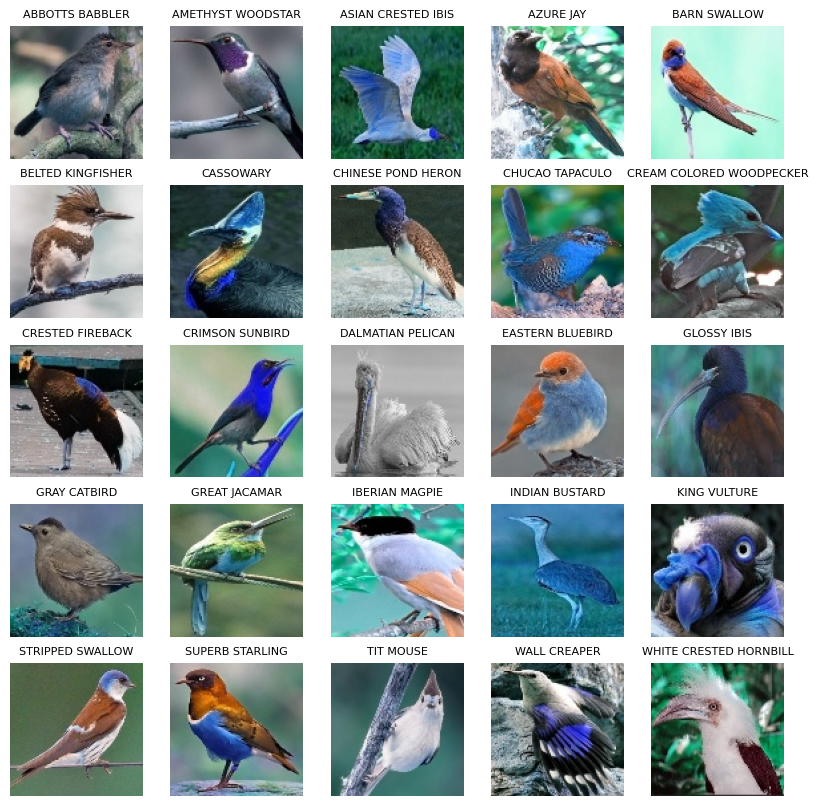

In [ ]:
# showing some sample training images
figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  #pdb.set_trace()
  cur_sample = sample_images[name_of_the_bird_species[i-1]]
  img   = cur_sample['img']
  label = name_of_the_bird_species[i-1]
  figure.add_subplot(rows, cols, i)
  plt.title(label, fontsize=8)
  plt.axis("off")
  #print('image tensor size:', img.shape)
  plt.imshow(img)
  print('image tensor size:', img.shape)
plt.show()


#__Network Codes for AlexNet, VGGNet, and ResNet__
You can use the following network classes when you fine-tune your models.

In [ ]:
# CNN networks preparation for fine-tuning:
#     1) AlexNet
#     2) VGGNet
#     3) ResNet
#-----------------------------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import models
import os
import pdb

class AlexNet(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super(AlexNet, self).__init__()
        net = models.alexnet(pretrained=True)

        self.features   = net.features
        self.avgpool    = net.avgpool

        self.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 512),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(512, num_classes)
        )


    def forward(self, x):
        #print("shape of input: ", x.shape)
        x = self.features(x)
        #print("output shape (self.features): ", x.shape)
        x = self.avgpool(x)
        #print("output shape (self.avgpool): ", x.shape)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        #print("output shape (self.classifier): ", x.shape)
        return x

# You can give any name to your new network, e.g., VGG.
# You should load the pretrained VGG model from torchvision.models.
# This model was trained on over a million real-world images from ImageNet.
# The idea is to bootstrap our CNN network weights with pretrained weights.
# Our model will converge to a solution faster.
# This training process is called 'fine-tuning.'

class VGGNet(nn.Module):
    def __init__(self, num_classes, pretrained=True, bn=False):
        super(VGGNet, self).__init__()
        net = models.vgg16(pretrained=True)

        self.features = net.features
        self.avgpool = net.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 512),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(512, num_classes)
        )
        #pdb.set_trace()

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


# You can give any name to your new network, e.g., ResNet.
# You should load the pretrained ResNet model from torchvision.models.
# This model was trained on over a million real-world images from ImageNet.
# The idea is to bootstrap our CNN network weights with pretrained weights.
# Our model will converge to a solution faster.
# This training process is called 'fine-tuning.'

class ResNet152(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super(ResNet152, self).__init__()
        net = models.resnet152(pretrained=True)

        num_features = net.fc.in_features
        net.fc = nn.Linear(num_features, num_classes)

        self.conv1 = net.conv1
        self.bn1 = net.bn1
        self.relu = net.relu
        self.maxpool = net.maxpool

        self.layer1 = net.layer1
        self.layer2 = net.layer2
        self.layer3 = net.layer3
        self.layer4 = net.layer4

        self.avgpool = net.avgpool
        self.fc = net.fc

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x



#__Model 1: AlexNet for fine-tuning and evaluating__

In [ ]:
# Step 1: load the Torch library and other utilities
#----------------------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision import transforms, datasets
from torchvision import models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas
import time
import numpy as np
import os
import pdb

# check to see if torch.cuda is available, otherwise it will use CPU
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

train_dataset =  "/content/drive/MyDrive/train"
test_dataset = "/content/drive/MyDrive/test"
number_of_classes = len(name_of_the_bird_species)

Using cuda device


In [ ]:
from torchvision import datasets, transforms

# Apply transformations to the images
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create ImageFolder datasets for training and testing
train_dataset = datasets.ImageFolder(root=train_dataset, transform=data_transforms)
test_dataset = datasets.ImageFolder(root=test_dataset, transform=data_transforms)

I had to normalize the data here so that it had the correct batch size for alexnet. To do this I had to imort the the functions datasets and transforms.

To evaluate all 3 of these models I will use a confusion matrix and 2 graps, one showing loss vs epoch and the other showing accuracy vs epoch.

In this project I am using the CNN algorithems, AlexNet, VGGNet and ResNet. all of these models use an optimization algorithem. Each of the layers are fine tuned in each epoch. Their wheights change based on the perevius accuracy and if the image predicted was correct. The algorithem fine tunes these based on the accuracy and loss. The amount of epochs and batch size could also potentially be fine tuned.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dro

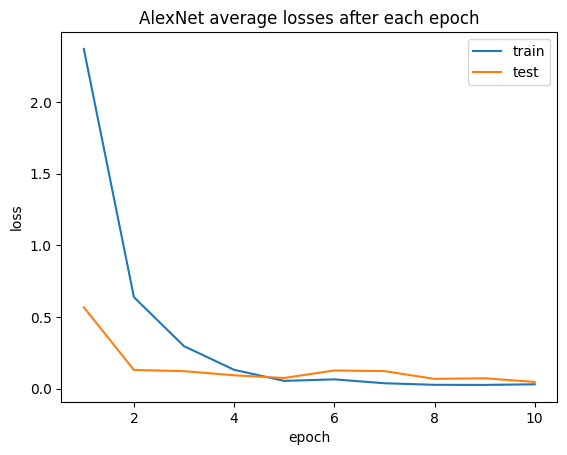

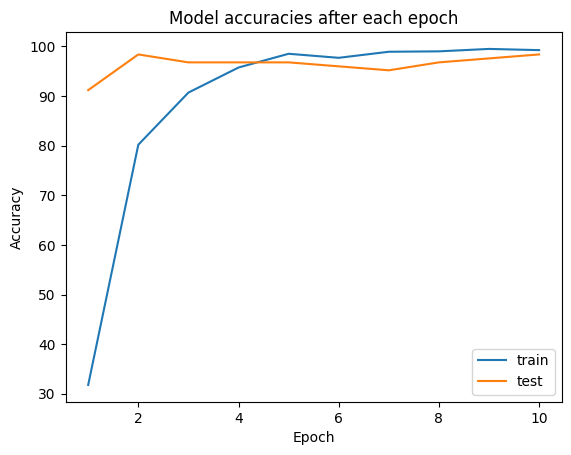

In [ ]:
# visualize the accuracy curves for AlexNet

def train_loop(dataloader, model, loss_fn, optimizer):

    size            = len(dataloader.dataset)
    num_batches     = len(dataloader)

    model.train()

    train_loss      = 0
    correct         = 0
    train_pred_all  = []
    train_y_all     = []

    for batch, (X, y) in enumerate(dataloader):

        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)


        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

        pred_prob   = softmax(pred)
        pred_y 			= torch.max(pred_prob, 1)[1]
        train_correct = (pred_y == y).sum()
        correct    += train_correct.data

        train_pred_all.append(pred_y)
        train_y_all.append(y)


    train_pred_all = torch.cat(train_pred_all)
    train_y_all = torch.cat(train_y_all)

    train_loss = train_loss/num_batches
    correct    = correct.cpu().numpy()/size

    print('Confusion matrix for training set:\n', confusion_matrix(train_y_all.cpu().data, train_pred_all.cpu().data))
    return train_loss, 100*correct


def test_loop(dataloader, model, loss_fn):

    model.eval()

    size                = len(dataloader.dataset)
    num_batches         = len(dataloader)
    test_loss, correct  = 0, 0
    test_pred_all       = []
    test_y_all          = []


    with torch.no_grad():

      for X, y in dataloader:


        X = X.to(device)
        y = y.to(device)


        pred = model(X)
        test_loss += loss_fn(pred, y).item()


        pred_prob     = softmax(pred)
        pred_y        = torch.max(pred_prob, 1)[1]
        test_correct  = (pred_y == y).sum()
        correct      += test_correct.data

        test_pred_all.append(pred_y)
        test_y_all.append(y)


    test_pred_all = torch.cat(test_pred_all)
    test_y_all = torch.cat(test_y_all)

    test_loss = test_loss/num_batches
    correct   = correct.cpu().numpy()/size
    print(f"Test Performance: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    print('Confusion matrix for test set:\n', confusion_matrix(test_y_all.cpu().data, test_pred_all.cpu().data))
    return test_loss, 100*correct, confusion_matrix(test_y_all.cpu().data, test_pred_all.cpu().data)



cnn_model = AlexNet(number_of_classes)
cnn_model.to(device)
print(cnn_model)


learning_rate     = 1e-4
batch_size_val    = 32
epochs            = 10
loss_fn           = nn.CrossEntropyLoss()
optimizer         = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)
softmax           = nn.Softmax(dim=1)
train_dataloader  = DataLoader(train_dataset, batch_size=batch_size_val, shuffle=True)
test_dataloader   = DataLoader(test_dataset, batch_size=batch_size_val,  shuffle=False)


train_losses = []
test_losses  = []
train_accuracies = []
test_accuracies = []
start_time = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    avg_train_loss, train_accuracy                    = train_loop(train_dataloader, cnn_model, loss_fn, optimizer)
    avg_test_loss, test_accuracy, conf_matrix_test    = test_loop(test_dataloader,   cnn_model, loss_fn)

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

print("AlexNet model has been fine-tuned!")
print("Total fine-tuning time: %.3f sec" %( (time.time()-start_time)) )
print("Total fine-tuning time: %.3f hrs" %( (time.time()-start_time)/3600) )
plt.plot(range(1,epochs+1), train_losses)
plt.plot(range(1,epochs+1), test_losses)
plt.title('AlexNet average losses after each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(range(1,epochs+1), train_accuracies)
plt.plot(range(1,epochs+1), test_accuracies)
plt.title('Model accuracies after each epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()


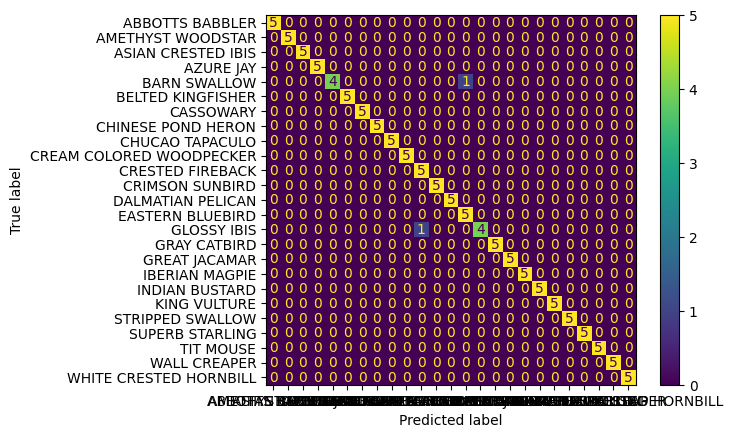

In [ ]:
# visualizing the confusion matrix on the test set after the final epoch
dataset_labels = ['ABBOTTS BABBLER', 'AMETHYST WOODSTAR', 'ASIAN CRESTED IBIS', 'AZURE JAY', 'BARN SWALLOW', 'BELTED KINGFISHER', 'CASSOWARY', 'CHINESE POND HERON', 'CHUCAO TAPACULO', 'CREAM COLORED WOODPECKER', 'CRESTED FIREBACK', 'CRIMSON SUNBIRD', 'DALMATIAN PELICAN', 'EASTERN BLUEBIRD', 'GLOSSY IBIS', 'GRAY CATBIRD', 'GREAT JACAMAR', 'IBERIAN MAGPIE', 'INDIAN BUSTARD', 'KING VULTURE', 'STRIPPED SWALLOW', 'SUPERB STARLING', 'TIT MOUSE', 'WALL CREAPER', 'WHITE CRESTED HORNBILL']


displ = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=dataset_labels)
displ.plot()
plt.show()
# your code goes here for building the confusion matrix

To evalute this model I created a confusion matrix. This way we can see exactly what the macine learning model got correct and what it got wrong. As shown above the model was nearly perfect only missinterpreting the glossy ibis and the barn swallow. This could maybe even be improved because the glossy ibis was the only bird in the training set that didnt have 50 samples. if it did have 50 samples the model would have been even more accurate.

#__Model 2: VGGNet for fine-tuning and evaluating__

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGGNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

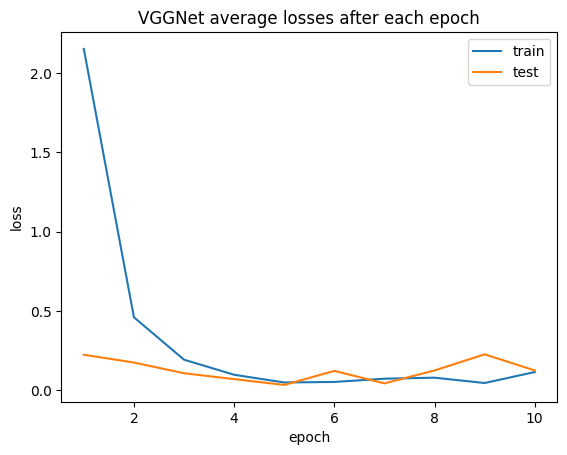

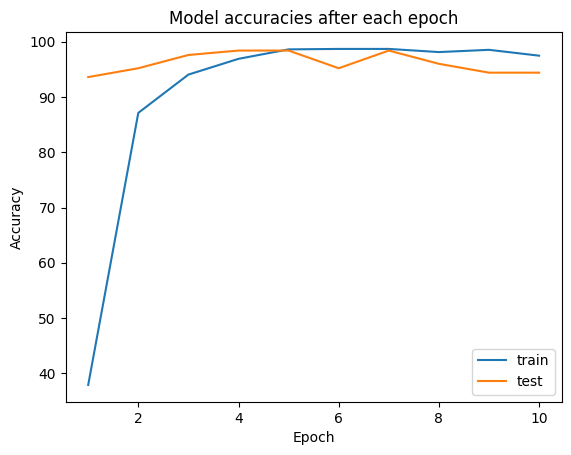

In [ ]:


def train_loop(dataloader, model, loss_fn, optimizer):

    size            = len(dataloader.dataset)
    num_batches     = len(dataloader)

    model.train()

    train_loss      = 0
    correct         = 0
    train_pred_all  = []
    train_y_all     = []

    for batch, (X, y) in enumerate(dataloader):

        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)


        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

        pred_prob   = softmax(pred)
        pred_y 			= torch.max(pred_prob, 1)[1]
        train_correct = (pred_y == y).sum()
        correct    += train_correct.data

        train_pred_all.append(pred_y)
        train_y_all.append(y)


    train_pred_all = torch.cat(train_pred_all)
    train_y_all = torch.cat(train_y_all)

    train_loss = train_loss/num_batches
    correct    = correct.cpu().numpy()/size

    print('Confusion matrix for training set:\n', confusion_matrix(train_y_all.cpu().data, train_pred_all.cpu().data))
    return train_loss, 100*correct


def test_loop(dataloader, model, loss_fn):

    model.eval()

    size                = len(dataloader.dataset)
    num_batches         = len(dataloader)
    test_loss, correct  = 0, 0
    test_pred_all       = []
    test_y_all          = []


    with torch.no_grad():

      for X, y in dataloader:


        X = X.to(device)
        y = y.to(device)


        pred = model(X)
        test_loss += loss_fn(pred, y).item()


        pred_prob     = softmax(pred)
        pred_y        = torch.max(pred_prob, 1)[1]
        test_correct  = (pred_y == y).sum()
        correct      += test_correct.data

        test_pred_all.append(pred_y)
        test_y_all.append(y)


    test_pred_all = torch.cat(test_pred_all)
    test_y_all = torch.cat(test_y_all)

    test_loss = test_loss/num_batches
    correct   = correct.cpu().numpy()/size
    print(f"Test Performance: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    print('Confusion matrix for test set:\n', confusion_matrix(test_y_all.cpu().data, test_pred_all.cpu().data))
    return test_loss, 100*correct, confusion_matrix(test_y_all.cpu().data, test_pred_all.cpu().data)



cnn_model = VGGNet(number_of_classes)
cnn_model.to(device)
print(cnn_model)


learning_rate     = 1e-4
batch_size_val    = 32
epochs            = 10
loss_fn           = nn.CrossEntropyLoss()
optimizer         = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)
softmax           = nn.Softmax(dim=1)

train_dataloader  = DataLoader(train_dataset, batch_size=batch_size_val, shuffle=True)
test_dataloader   = DataLoader(test_dataset, batch_size=batch_size_val,  shuffle=False)

train_losses = []
test_losses  = []
train_accuracies = []
test_accuracies = []
start_time = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    avg_train_loss, train_accuracy                    = train_loop(train_dataloader, cnn_model, loss_fn, optimizer)
    avg_test_loss, test_accuracy, conf_matrix_test    = test_loop(test_dataloader,   cnn_model, loss_fn)

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

print("VGGNet model has been fine-tuned!")
print("Total fine-tuning time: %.3f sec" %( (time.time()-start_time)) )
print("Total fine-tuning time: %.3f hrs" %( (time.time()-start_time)/3600) )
plt.plot(range(1,epochs+1), train_losses)
plt.plot(range(1,epochs+1), test_losses)
plt.title('VGGNet average losses after each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(range(1,epochs+1), train_accuracies)
plt.plot(range(1,epochs+1), test_accuracies)
plt.title('Model accuracies after each epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()


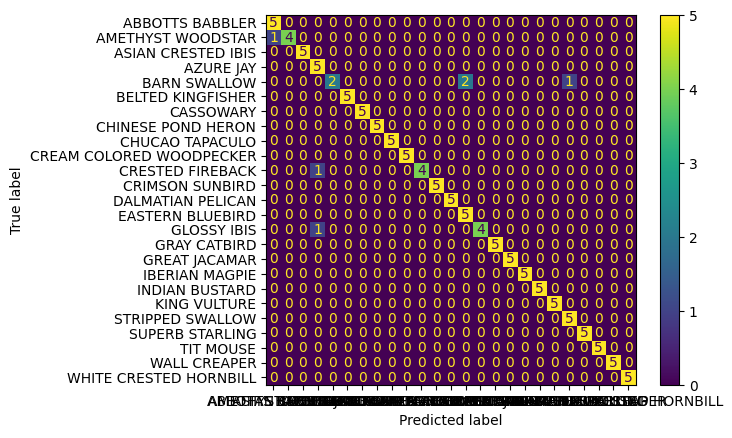

In [ ]:
# visualizing the confusion matrix on the test set after the final epoch
dataset_labels = ['ABBOTTS BABBLER', 'AMETHYST WOODSTAR', 'ASIAN CRESTED IBIS', 'AZURE JAY', 'BARN SWALLOW', 'BELTED KINGFISHER', 'CASSOWARY', 'CHINESE POND HERON', 'CHUCAO TAPACULO', 'CREAM COLORED WOODPECKER', 'CRESTED FIREBACK', 'CRIMSON SUNBIRD', 'DALMATIAN PELICAN', 'EASTERN BLUEBIRD', 'GLOSSY IBIS', 'GRAY CATBIRD', 'GREAT JACAMAR', 'IBERIAN MAGPIE', 'INDIAN BUSTARD', 'KING VULTURE', 'STRIPPED SWALLOW', 'SUPERB STARLING', 'TIT MOUSE', 'WALL CREAPER', 'WHITE CRESTED HORNBILL']


# option #2: prettify
displ = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=dataset_labels)
displ.plot()
plt.show()

#__Model 3: ResNet for fine-tuning and evaluating__

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 82.3MB/s]


ResNet152(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(

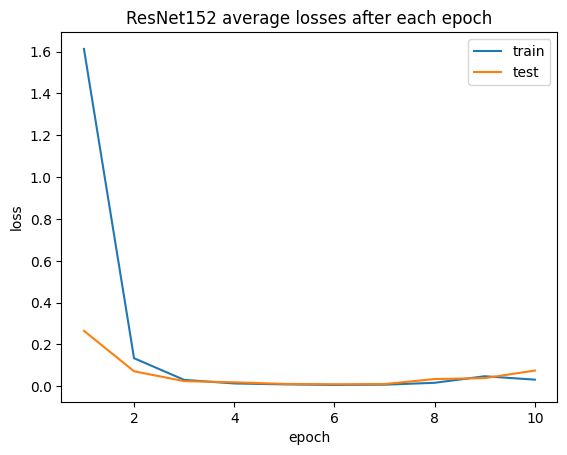

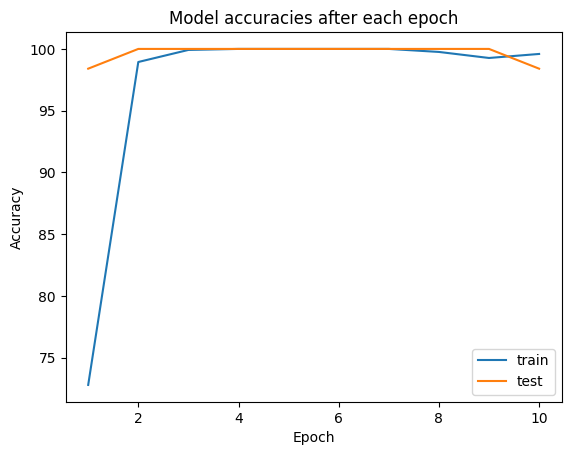

In [ ]:


def train_loop(dataloader, model, loss_fn, optimizer):

    size            = len(dataloader.dataset)
    num_batches     = len(dataloader)

    model.train()

    train_loss      = 0
    correct         = 0
    train_pred_all  = []
    train_y_all     = []

    for batch, (X, y) in enumerate(dataloader):

        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)


        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

        pred_prob   = softmax(pred)
        pred_y 			= torch.max(pred_prob, 1)[1]
        train_correct = (pred_y == y).sum()
        correct    += train_correct.data

        train_pred_all.append(pred_y)
        train_y_all.append(y)


    train_pred_all = torch.cat(train_pred_all)
    train_y_all = torch.cat(train_y_all)

    train_loss = train_loss/num_batches
    correct    = correct.cpu().numpy()/size

    print('Confusion matrix for training set:\n', confusion_matrix(train_y_all.cpu().data, train_pred_all.cpu().data))
    return train_loss, 100*correct


def test_loop(dataloader, model, loss_fn):

    model.eval()

    size                = len(dataloader.dataset)
    num_batches         = len(dataloader)
    test_loss, correct  = 0, 0
    test_pred_all       = []
    test_y_all          = []


    with torch.no_grad():

      for X, y in dataloader:


        X = X.to(device)
        y = y.to(device)


        pred = model(X)
        test_loss += loss_fn(pred, y).item()


        pred_prob     = softmax(pred)
        pred_y        = torch.max(pred_prob, 1)[1]
        test_correct  = (pred_y == y).sum()
        correct      += test_correct.data

        test_pred_all.append(pred_y)
        test_y_all.append(y)


    test_pred_all = torch.cat(test_pred_all)
    test_y_all = torch.cat(test_y_all)

    test_loss = test_loss/num_batches
    correct   = correct.cpu().numpy()/size
    print(f"Test Performance: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    print('Confusion matrix for test set:\n', confusion_matrix(test_y_all.cpu().data, test_pred_all.cpu().data))
    return test_loss, 100*correct, confusion_matrix(test_y_all.cpu().data, test_pred_all.cpu().data)



cnn_model = ResNet152(number_of_classes)
cnn_model.to(device)
print(cnn_model)


learning_rate     = 1e-4
batch_size_val    = 32
epochs            = 10
loss_fn           = nn.CrossEntropyLoss()
optimizer         = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)
softmax           = nn.Softmax(dim=1)

train_dataloader  = DataLoader(train_dataset, batch_size=batch_size_val, shuffle=True)
test_dataloader   = DataLoader(test_dataset, batch_size=batch_size_val,  shuffle=False)


train_losses = []
test_losses  = []
train_accuracies = []
test_accuracies = []
start_time = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    avg_train_loss, train_accuracy                    = train_loop(train_dataloader, cnn_model, loss_fn, optimizer)
    avg_test_loss, test_accuracy, conf_matrix_test    = test_loop(test_dataloader,   cnn_model, loss_fn)

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

print("ResNet152 model has been fine-tuned!")
print("Total fine-tuning time: %.3f sec" %( (time.time()-start_time)) )
print("Total fine-tuning time: %.3f hrs" %( (time.time()-start_time)/3600) )
plt.plot(range(1,epochs+1), train_losses)
plt.plot(range(1,epochs+1), test_losses)
plt.title('ResNet152 average losses after each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(range(1,epochs+1), train_accuracies)
plt.plot(range(1,epochs+1), test_accuracies)
plt.title('Model accuracies after each epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

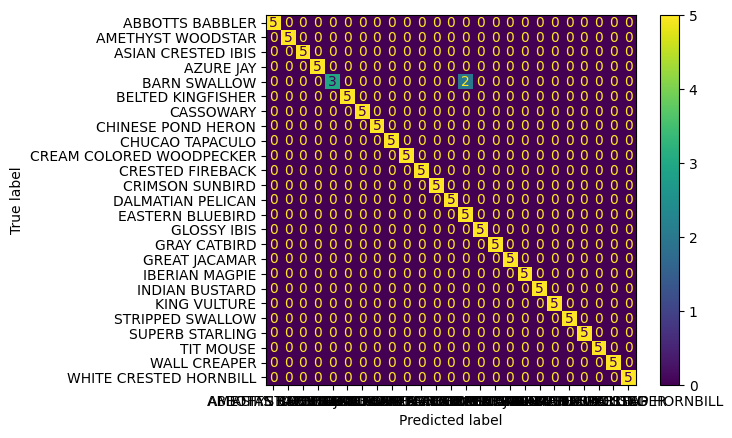

In [ ]:
# visualizing the confusion matrix on the test set after the final epoch
dataset_labels = ['ABBOTTS BABBLER', 'AMETHYST WOODSTAR', 'ASIAN CRESTED IBIS', 'AZURE JAY', 'BARN SWALLOW', 'BELTED KINGFISHER', 'CASSOWARY', 'CHINESE POND HERON', 'CHUCAO TAPACULO', 'CREAM COLORED WOODPECKER', 'CRESTED FIREBACK', 'CRIMSON SUNBIRD', 'DALMATIAN PELICAN', 'EASTERN BLUEBIRD', 'GLOSSY IBIS', 'GRAY CATBIRD', 'GREAT JACAMAR', 'IBERIAN MAGPIE', 'INDIAN BUSTARD', 'KING VULTURE', 'STRIPPED SWALLOW', 'SUPERB STARLING', 'TIT MOUSE', 'WALL CREAPER', 'WHITE CRESTED HORNBILL']


# option #2: prettify
displ = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=dataset_labels)
displ.plot()
plt.show()

This project had some bumps in the road, first was figuring out how to normalize the data. The code wasnt running right away and it took me a while to realize that it was because i hadnt normalized the data correctly. Besides this the project overall when smoothly exept for the first alex net model I ran took a super long time to run so I had to stop it and do some debuging to find out why this was.

For alexnet the epoch that preformed the best was number 9, for ResNet the epoch that performed the best was number 5 and for VGGNet the epoch that performed the best was number 9 aswell. Overall the model with the best performance all around was AlexNet. It had a similar confusion matrix to ResNet but inseted of getting 2 incorrect for 1 species it got 1 incorect from 2 species and one was from the species with less samples then the others. I think that this model would be easier to improve.

In this project I found that VGGNet preforms a lot worse then AlexNet and ResNet, at least when it comes to this data set. I thought this was intresting because normaly VGGNet performs better then Alex net, especially when it comes to harder taskes like image net. Maybe it didnt perform as well because there were not enough classes or the immages were not complex enough. The models already have great results by the first epoch because in this project we were just fine tuning them, bringing their already good accuracy even higher up making them nearly perfect. I don't think adding more epochs to these tests would increase the accuract much, most of the time the highest accuracy was not found on the largest epoch and the graphs are almost straight lines berly improving each time. Overall this data set was well suited for an AlexNet model which had very impressive results, getting only 2 perdictions wrong.